In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv('who_suicide_statistics.csv')
suicide = data.dropna(axis = 0)
suicide_corrected = suicide.replace('5-14 years', '05-14 years')

demographics = suicide_corrected.groupby(['age', 'sex'])['suicides_no', 'population'].mean()
demographics['fraction'] = (demographics['suicides_no']/demographics['population'])*100

sex = demographics.groupby(['sex']).mean()

/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:445: UserWarning: The handle <BarContainer object of 12 artists> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


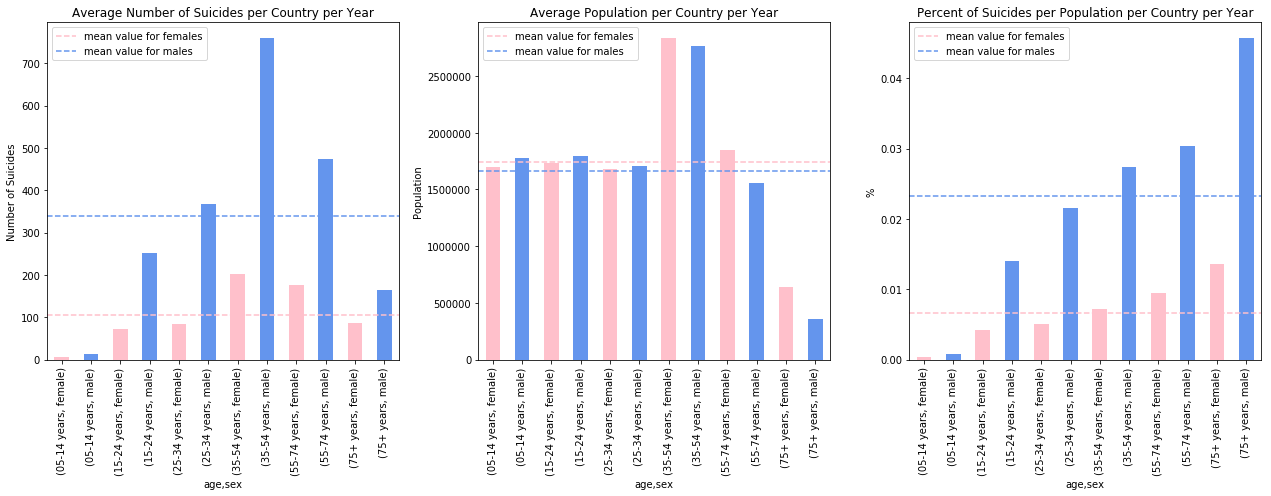

In [111]:
colors = [('pink', 'cornflowerblue')]*3
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,7))
plot = demographics.plot(kind='bar', color=colors, subplots=True, ax=ax, legend=False,
                 title = ('Average Number of Suicides per Country per Year',
                          'Average Population per Country per Year', 
                          'Percent of Suicides per Population per Country per Year'))

ax[0].axhline(sex['suicides_no'][0], linestyle='--', color='pink')
ax[0].axhline(sex['suicides_no'][1], linestyle='--', color='cornflowerblue')
ax[0].legend(['mean value for females', 'mean value for males', '_'])
ax[0].set_ylabel('Number of Suicides')

ax[1].axhline(sex['population'][0], linestyle='--', color='pink', label='mean value for females')
ax[1].axhline(sex['population'][1], linestyle='--', color='cornflowerblue', label='mean value for males')
ax[1].legend(['mean value for females', 'mean value for males', '_'])
ax[1].set_ylabel('Population')

ax[2].axhline(sex['fraction'][0], linestyle='--', color='pink', label='mean value for females')
ax[2].axhline(sex['fraction'][1], linestyle='--', color='cornflowerblue', label='mean value for males')
ax[2].legend(['mean value for females', 'mean value for males', '_'])
ax[2].set_ylabel('%')

plt.tight_layout()
plt.show()

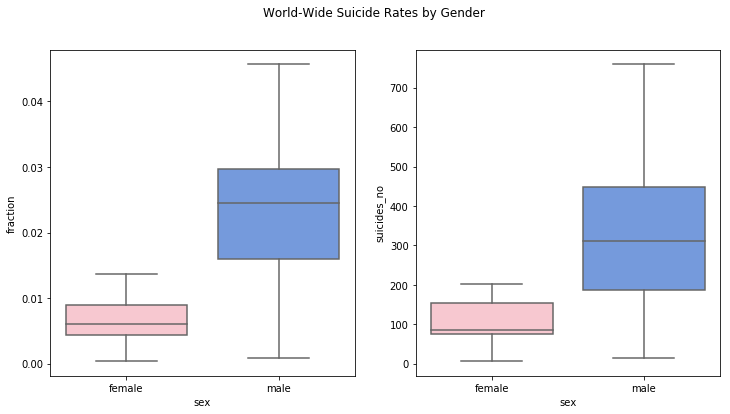

In [112]:
sexes = demographics.reset_index()
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

my_pal = {"female": "pink", "male": "cornflowerblue"}
sexes_plot1 = sns.boxplot(x='sex', y='fraction',data=sexes, palette=my_pal, ax=ax[0])
sexes_plot2 = sns.boxplot(x='sex', y='suicides_no',data=sexes, palette=my_pal, ax=ax[1])

fig.suptitle('World-Wide Suicide Rates by Gender')
plt.plot();

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


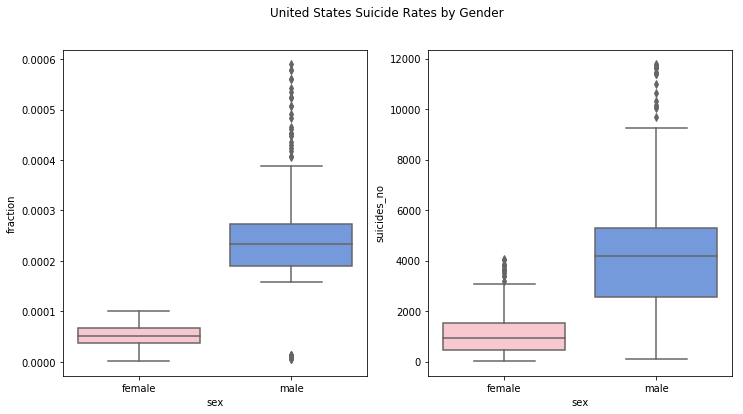

In [109]:
us = suicide_corrected[suicide_corrected['country'] == 'United States of America']
us['fraction'] = us['suicides_no']/us['population']

fig1, ax1 = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

my_pal = {"female": "pink", "male": "cornflowerblue"}
sexes_plot1 = sns.boxplot(x='sex', y='fraction', data=us, palette=my_pal, ax=ax1[0])
sexes_plot2 = sns.boxplot(x='sex', y='suicides_no', data=us, palette=my_pal, ax=ax1[1])

fig1.suptitle('United States Suicide Rates by Gender')
plt.plot();

We can clearly see from the above plots that the suicide rate among men is significantly higher than that of women, throughout the world. This indicates that there is a fundamental difference between men and women when it comes to committing suicide. Investigating the reason for this is not only complicated but near to impossible for all the reasons that could be causing this drastic difference; mental factors as well as societal and behavioral factors can all play a significant role in this effect. The number of possibilities is endless. Studying some factors in which we think may contribute to this cause will help our understanding of why there is such a large difference between men and women in this scenario.

There is a well known and studied phenomena called the 'gender paradox of suicidal behaviour'. Studies have shown that women actually contemplate comitting suicide $\textit{more}$ often than men, but the result of death in suicidal attempts are much higher in men than women (which is what we found in the data shown here). There are many reasons as to why this could be the case. Some suggest that impulsiveness can more often lead to the result of death from a suicide attempt. To help bring insight into this phenomena, the proposed study will be to analyse the impulsive behaviour between men and women. 

To start the experiment it is important to have a definition for what we consider impulsive behaviour to be. One widely used definition which we will adopt is "a predisposition toward rapid, unplanned reactions to internal or external stimuli without regard to the negative consequences of these reactions to the impulsive individual or to others".

A current model suggests that there are three different types of impulsiveness that can be assed using behavioral measures: 
1. Response initiation - defined as the 'process of rapid initiation or spontaneous action that is unplanned.'
2. Response inhibition - defined as the 'failure to inhibit a rapid, unplanned action once it has been initiated.'
3. Consequence sensitivity - defined as the 'failure to tolerate delays for rewards or delay gratification.' 

These three measures will be how we will test the impusliveness of our chosen groups. The chosen test subjects will be two groups; a group of randomly selected men and another group of randomly selected women. Our succes metric will be based off of the results of the behavioural tests. The subjects will also be monitored for demographic and health information as secondary metrics. Ideally the test subjects will be chosen from around the world and will be as large as possible. But, because that would not be very realistic, then we will focus on one country - like the United States - where we also see the same trends. 

Setting up the experiement, it will be important to have our laboratory sites distributed throughout the U.S. I would make sure to locate these laboratories in areas that are easy to get to from multiple locations and try not to only locate in metropolitan areas but rural areas as well. 

The next step would be choosing the test subjects. There would be a multi-step process here. First would be advertisements. Depending on the locations, we would set up multiple kinds of advertisements; billboards, online, and television ads. The advertisement would lead to the second step: a subscription site. This would allow us to monitor who is applying and to create a pool for a random selection process in which we can control the number of test subjects. Once the user subscribes, we would then have them fill out a pre-test screening. The pre-test screening will be helpful in verifying the dedication/interest of the subscriber and since the test would be lab-drive, to make sure that they have the time commitment necessary for the test. We would then have the system randomly select those who qualify and bring them in for testing.

Once the test subjects have been chosen, we will conduct tests to measure the above listed behavioural indicators. We will then be able to use our results to look for any drastic differences between impulsive behaviour between men and women that could possbly help explane why the suicide rates between them are so different. 